In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
print(os.listdir())

['.ipynb_checkpoints', 'election.ipynb', 'electiondata4.csv']


In [3]:
df = pd.read_csv('electiondata4.csv')

In [4]:
df


ref       state      constituency won status   votes     (votes)  \
0        1      Ladakh         Ladakh(1)        won   65259   (+ 27862)   
1        2      Ladakh         Ladakh(1)       lost   37397   ( -27862)   
2        3      Ladakh         Ladakh(1)       lost   31956   ( -33303)   
3        4      Ladakh         Ladakh(1)        NaN     912   ( -64347)   
4        5      Kerala        Kollam(18)        won  443628  (+ 150302)   
...    ...         ...               ...        ...     ...         ...   
8897  8898  Tamil Nadu  CHENNAI NORTH(2)       lost     209  ( -497124)   
8898  8899  Tamil Nadu  CHENNAI NORTH(2)       lost     206  ( -497127)   
8899  8900  Tamil Nadu  CHENNAI NORTH(2)       lost     172  ( -497161)   
8900  8901  Tamil Nadu  CHENNAI NORTH(2)       lost     163  ( -497170)   
8901  8902  Tamil Nadu  CHENNAI NORTH(2)        NaN   13208  ( -484125)   

                   Name                     Party Name  
0        MOHMAD HANEEFA                    Independent  
1       TSERING NAMGYAL       Indian National Congress  
2         TASHI GYALSON         Bharatiya Janata Party  
3                  NOTA              None of the Above  
4     N K PREMACHANDRAN  Revolutionary Socialist Party  
...                 ...                            ...  
8897         D. KABILAN                    Independent  
8898  R.VINAYAGAMOORTHY                    Independent  
8899       P. MARIMUTHU                    Independent  
8900     V.MADHAN MOHAN                    Independent  
8901               NOTA              None of the Above  

[8902 rows x 8 columns]

In [5]:
df.head()

ref   state constituency won status   votes     (votes)               Name  \
0    1  Ladakh    Ladakh(1)        won   65259   (+ 27862)     MOHMAD HANEEFA   
1    2  Ladakh    Ladakh(1)       lost   37397   ( -27862)    TSERING NAMGYAL   
2    3  Ladakh    Ladakh(1)       lost   31956   ( -33303)      TASHI GYALSON   
3    4  Ladakh    Ladakh(1)        NaN     912   ( -64347)               NOTA   
4    5  Kerala   Kollam(18)        won  443628  (+ 150302)  N K PREMACHANDRAN   

                      Party Name  
0                    Independent  
1       Indian National Congress  
2         Bharatiya Janata Party  
3              None of the Above  
4  Revolutionary Socialist Party

In [6]:
df.columns


Index(['ref', 'state', 'constituency', 'won status', 'votes', '(votes)',
       'Name', 'Party Name'],
      dtype='object')

In [7]:
df.isnull()

ref  state  constituency  won status  votes  (votes)   Name  \
0     False  False         False       False  False    False  False   
1     False  False         False       False  False    False  False   
2     False  False         False       False  False    False  False   
3     False  False         False        True  False    False  False   
4     False  False         False       False  False    False  False   
...     ...    ...           ...         ...    ...      ...    ...   
8897  False  False         False       False  False    False  False   
8898  False  False         False       False  False    False  False   
8899  False  False         False       False  False    False  False   
8900  False  False         False       False  False    False  False   
8901  False  False         False        True  False    False  False   

      Party Name  
0          False  
1          False  
2          False  
3          False  
4          False  
...          ...  
8897       False  
8898       False  
8899       False  
8900       False  
8901       False  

[8902 rows x 8 columns]

In [8]:
df.isnull().sum()

ref               0
state             0
constituency      0
won status      542
votes             0
(votes)           1
Name              0
Party Name        0
dtype: int64

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ref           8902 non-null   int64 
 1   state         8902 non-null   object
 2   constituency  8902 non-null   object
 3   won status    8360 non-null   object
 4   votes         8902 non-null   object
 5   (votes)       8901 non-null   object
 6   Name          8902 non-null   object
 7   Party Name    8902 non-null   object
dtypes: int64(1), object(7)
memory usage: 556.5+ KB


In [13]:
df['votes'] = df['votes'].str.replace(',', '').str.extract('(\d+)').astype(float)

In [18]:
# Plotting - example: barplot for total votes by state
plt.figure(figsize=(12, 6))

<Figure size 2900x400 with 0 Axes>

<Figure size 2900x400 with 0 Axes>

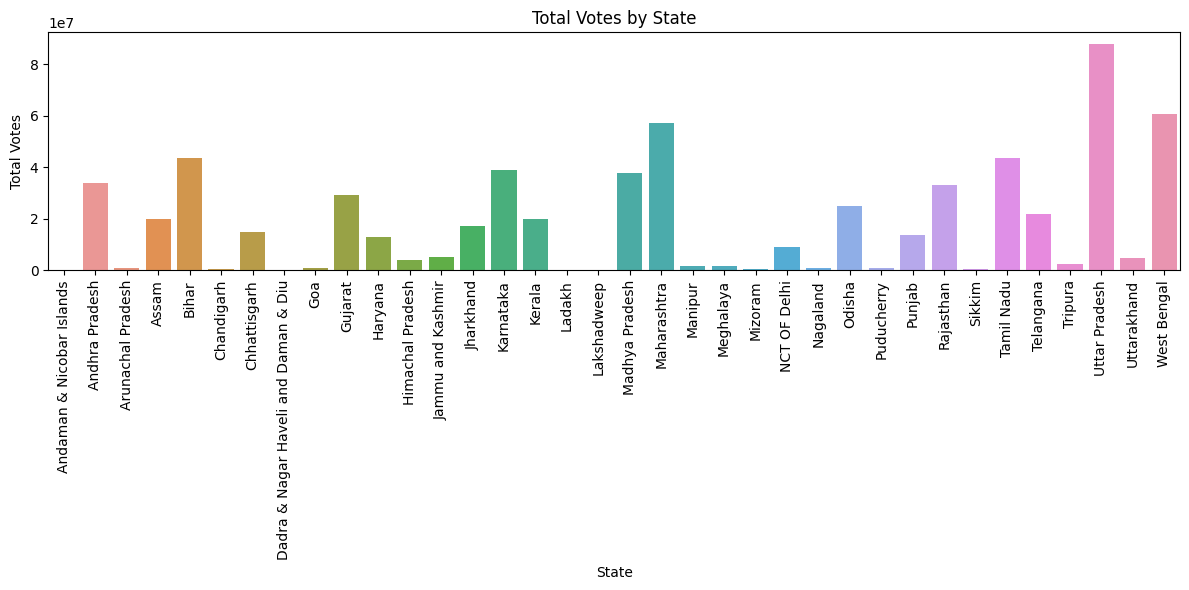

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='votes', data=df.groupby('state')['votes'].sum().reset_index())
plt.title('Total Votes by State')
plt.xlabel('State')
plt.ylabel('Total Votes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

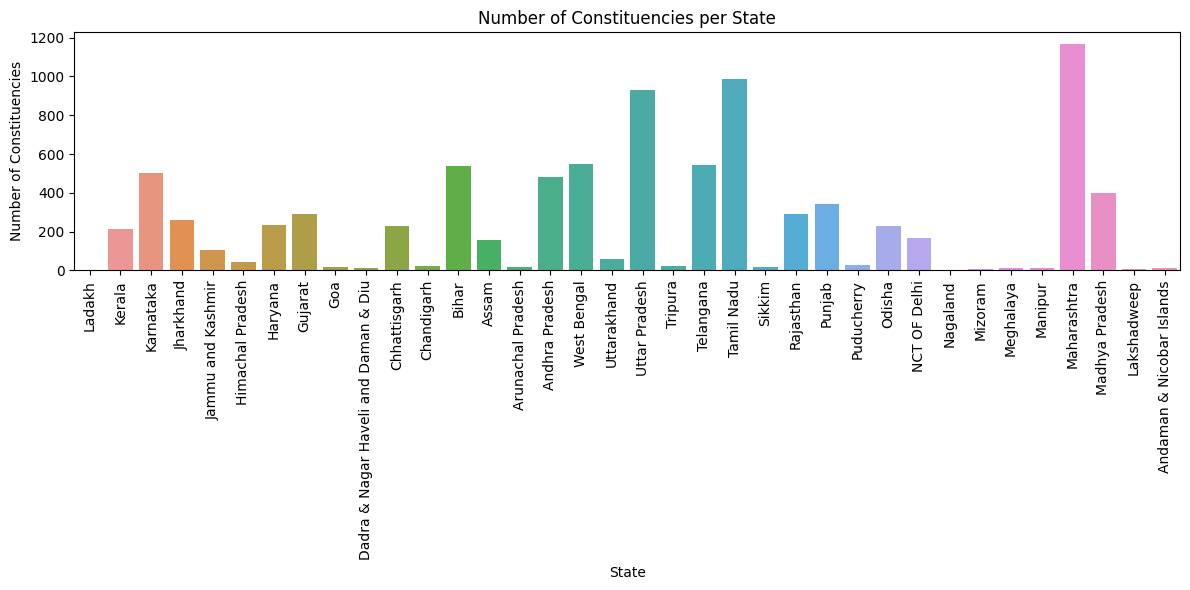

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(x='state', data=df)
plt.title('Number of Constituencies per State')
plt.xlabel('State')
plt.ylabel('Number of Constituencies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Bar Chart: Top 5 States with the most Constituencies

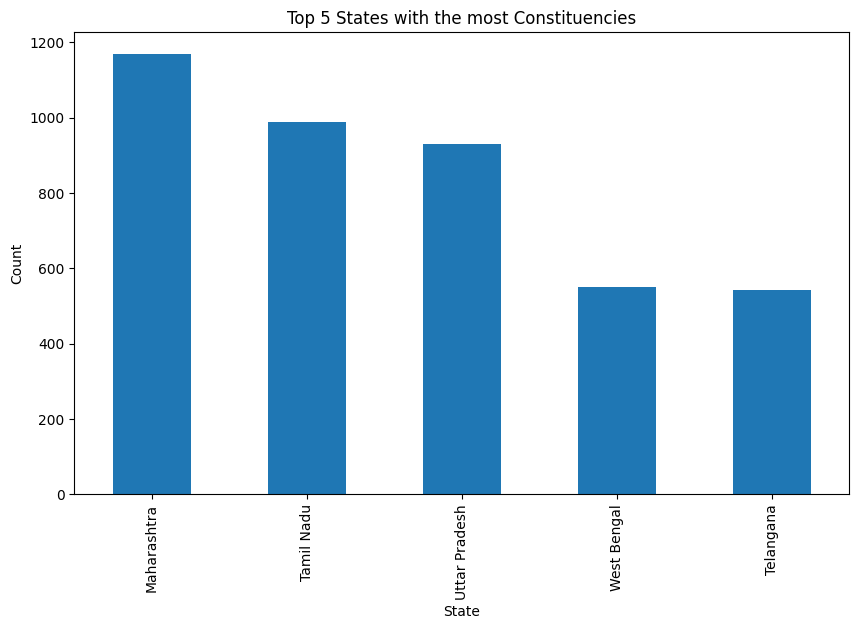

In [39]:
import matplotlib.pyplot as plt
state_counts = df['state'].value_counts().head(5)
plt.figure(figsize=(10,6))
state_counts.plot(kind='bar')
plt.title('Top 5 States with the most Constituencies')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

### Bar Chart: Top 5 Parties with the most Candidates

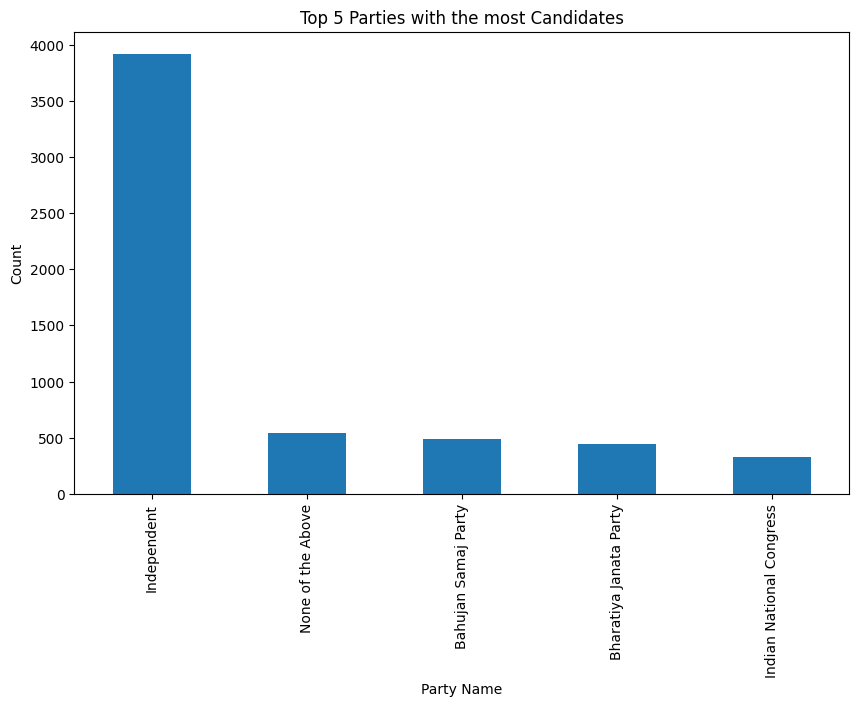

In [40]:
party_counts = df['Party Name'].value_counts().head(5)
plt.figure(figsize=(10,6))
party_counts.plot(kind='bar')
plt.title('Top 5 Parties with the most Candidates')
plt.xlabel('Party Name')
plt.ylabel('Count')
plt.show()

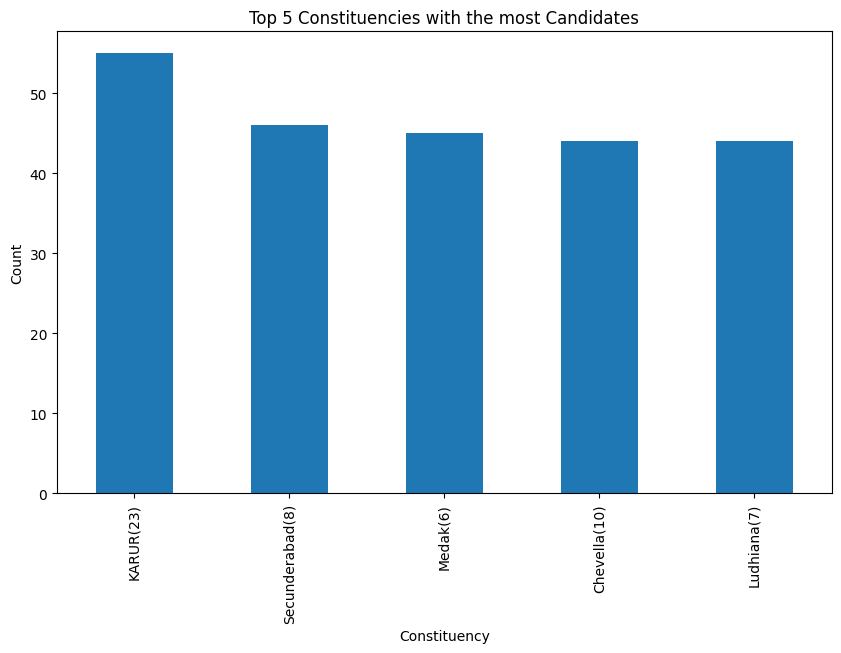

In [41]:
constituency_counts = df['constituency'].value_counts().head(5)
plt.figure(figsize=(10,6))
constituency_counts.plot(kind='bar')
plt.title('Top 5 Constituencies with the most Candidates')
plt.xlabel('Constituency')
plt.ylabel('Count')
plt.show()

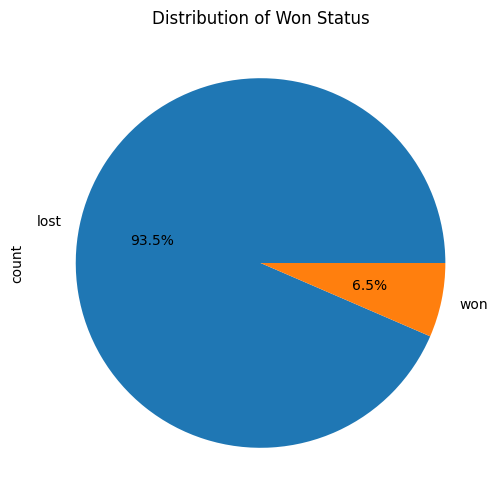

In [42]:
won_status_counts = df['won status'].value_counts()
plt.figure(figsize=(8,6))
won_status_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Won Status')
plt.show()

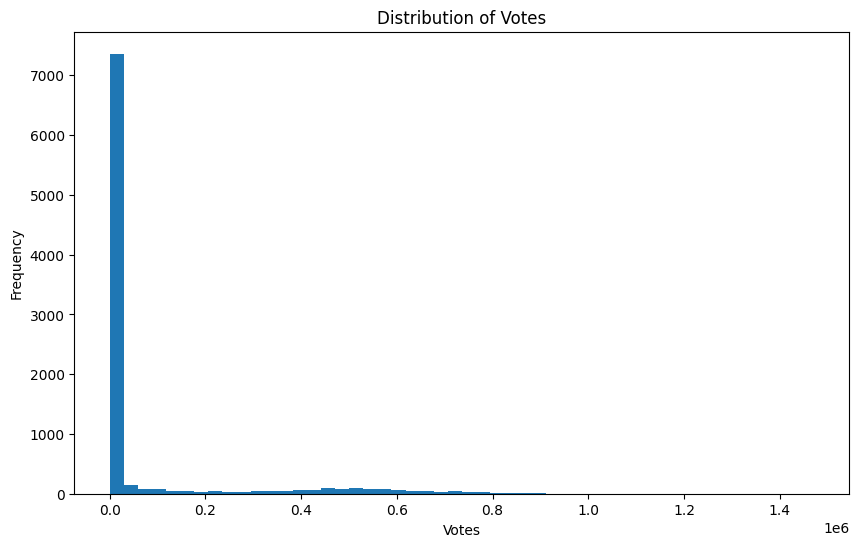

In [44]:
plt.figure(figsize=(10,6))
df['votes'].plot(kind='hist', bins=50)
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.show()

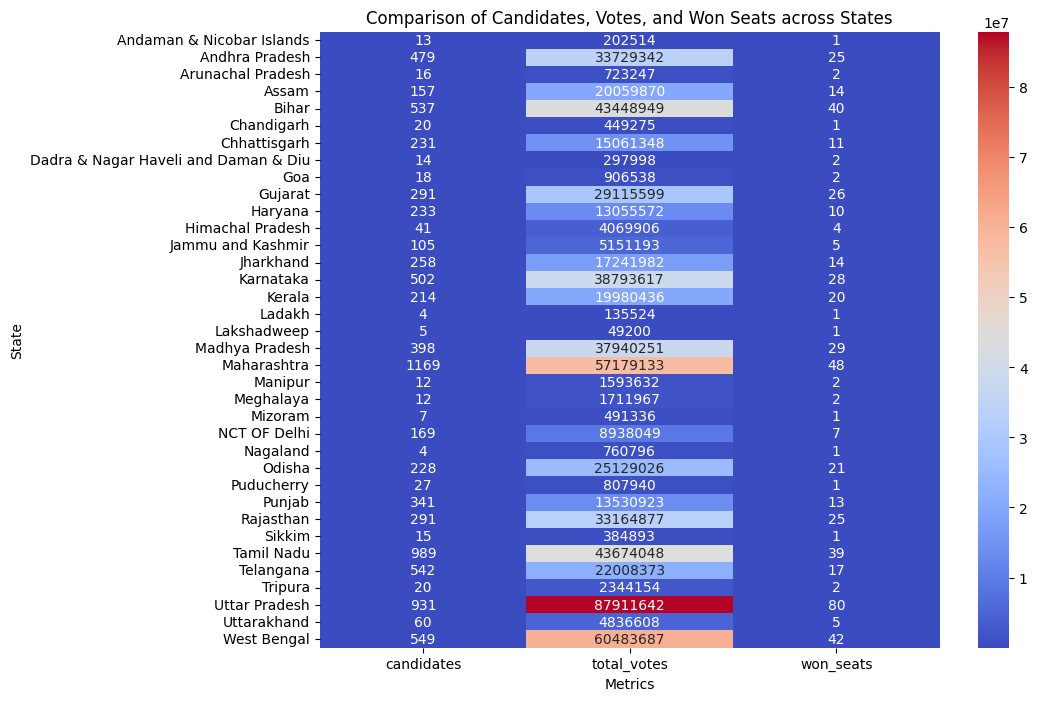

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of candidates, votes, and won status for each state
state_data = df.groupby('state').agg({
    'ref': 'count',
    'votes': 'sum',
    'won status': lambda x: x.eq('won').sum()
}).reset_index()

# Rename the columns
state_data.columns = ['state', 'candidates', 'total_votes', 'won_seats']

# Pivot the data to create a matrix for the heatmap
pivot_data = state_data.pivot_table(index='state', values=['candidates', 'total_votes', 'won_seats'], aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', fmt='.0f')
plt.title('Comparison of Candidates, Votes, and Won Seats across States')
plt.xlabel('Metrics')
plt.ylabel('State')
plt.show



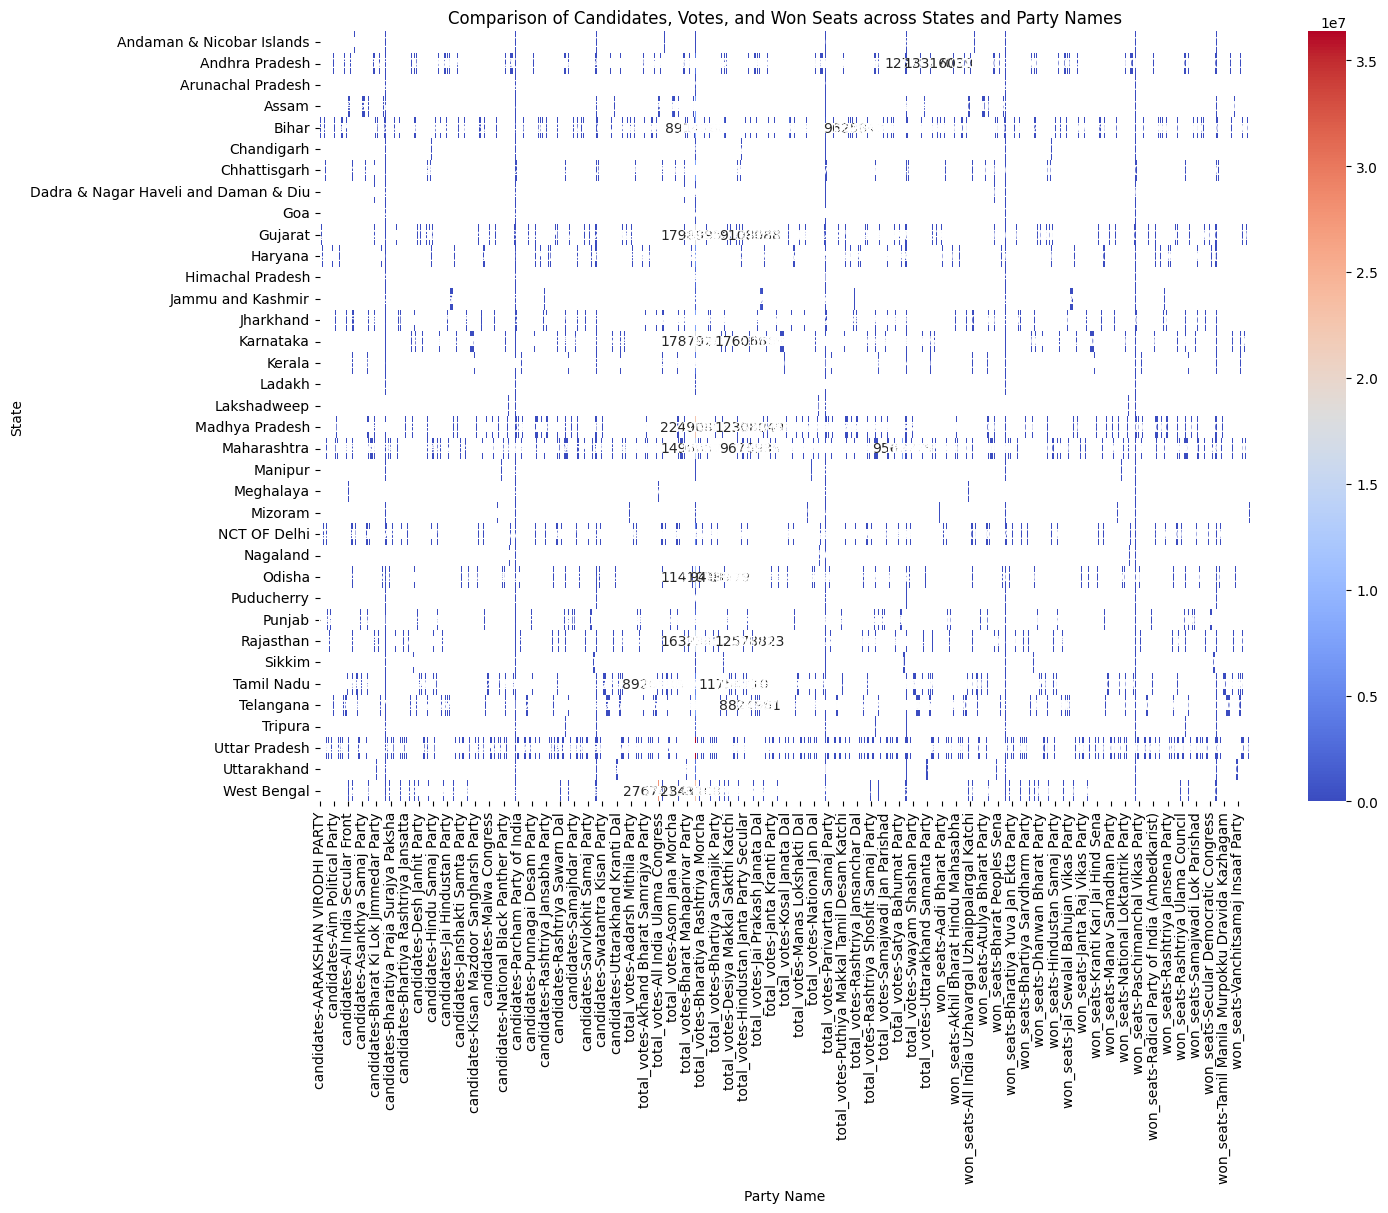

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of candidates, votes, and won status for each state and party
state_party_data = df.groupby(['state', 'Party Name']).agg({
    'ref': 'count',
    'votes': 'sum',
    'won status': lambda x: x.eq('won').sum()
}).reset_index()

# Rename the columns
state_party_data.columns = ['state', 'party', 'candidates', 'total_votes', 'won_seats']

# Pivot the data to create a matrix for the heatmap
pivot_data = state_party_data.pivot_table(index='state', columns='party', values=['candidates', 'total_votes', 'won_seats'])

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', fmt='.0f')
plt.title('Comparison of Candidates, Votes, and Won Seats across States and Party Names')
plt.xlabel('Party Name')
plt.ylabel('State')
plt.show()

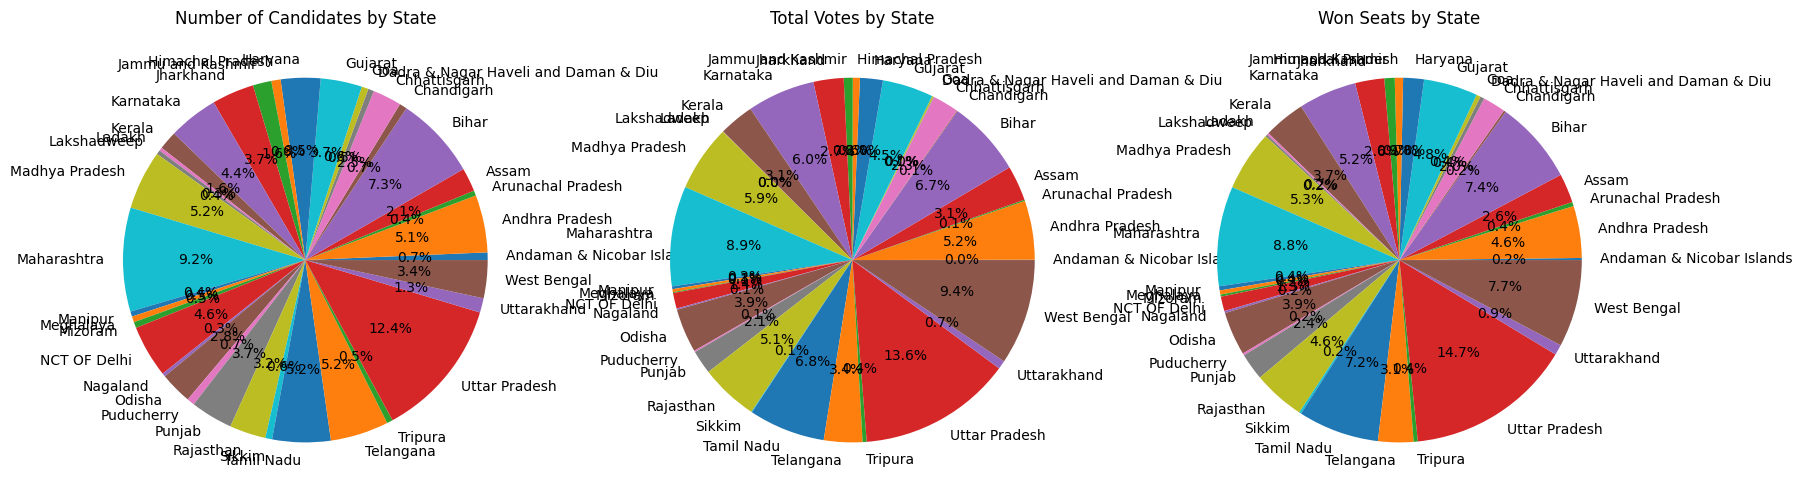

In [60]:
import matplotlib.pyplot as plt

# Calculate the number of candidates, votes, and won status for each state and party
state_party_data = df.groupby(['state', 'Party Name']).agg({
    'ref': 'count',
    'votes': 'sum',
    'won status': lambda x: x.eq('won').sum()
}).reset_index()

# Create a pie chart for each metric
fig, axs = plt.subplots(1, 3, figsize=(20, 15))

# Pie chart for number of candidates
axs[0].pie(state_party_data.groupby('state')['ref'].count(), labels=state_party_data['state'].unique(), autopct='%1.1f%%')
axs[0].set_title('Number of Candidates by State')

# Pie chart for total votes
axs[1].pie(state_party_data.groupby('state')['votes'].sum(), labels=state_party_data['state'].unique(), autopct='%1.1f%%')
axs[1].set_title('Total Votes by State')

# Pie chart for won seats
axs[2].pie(state_party_data.groupby('state')['won status'].sum(), labels=state_party_data['state'].unique(), autopct='%1.1f%%')
axs[2].set_title('Won Seats by State')

plt.show()

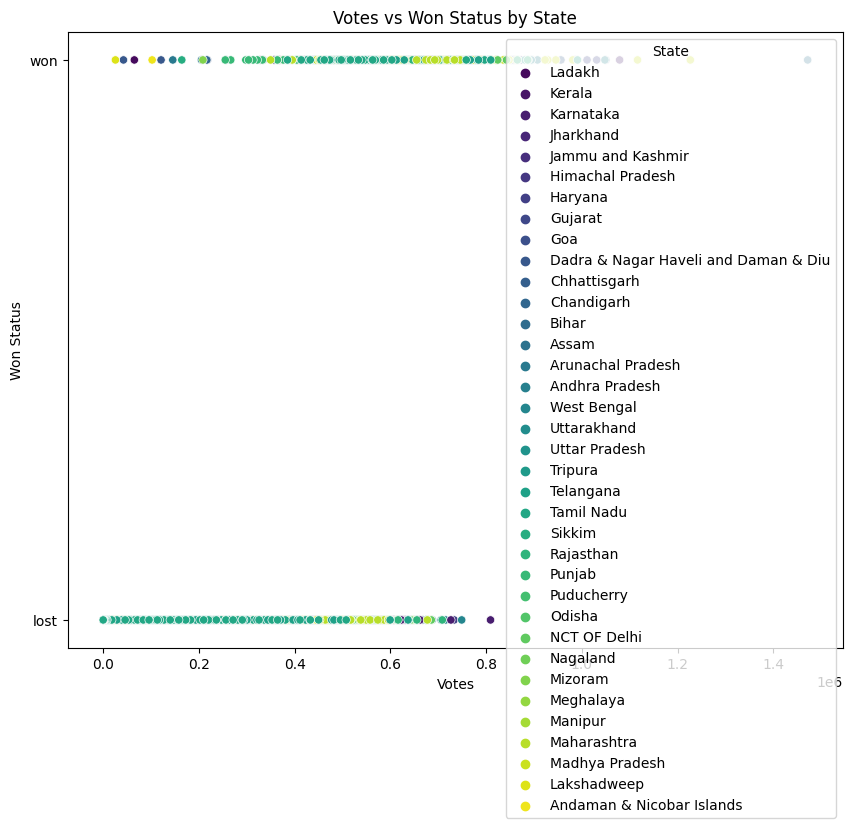

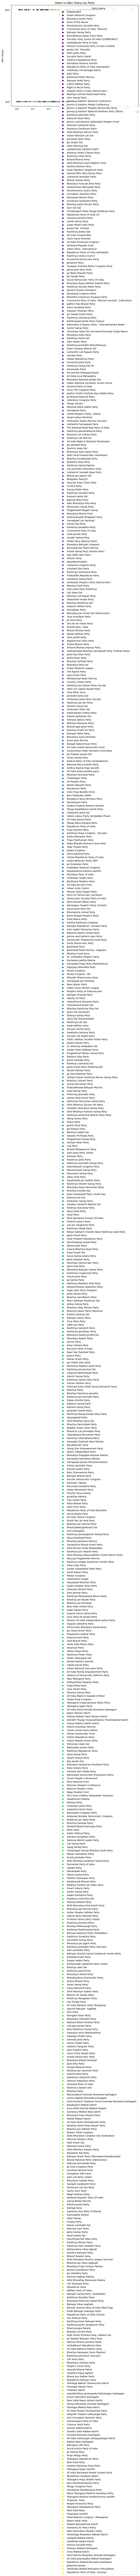

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot for votes vs won status by state and party
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='votes', y='won status', hue='state', palette='viridis')
plt.title('Votes vs Won Status by State')
plt.xlabel('Votes')
plt.ylabel('Won Status')
plt.legend(title='State', loc='upper right')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='votes', y='won status', hue='Party Name', palette='viridis')
plt.title('Votes vs Won Status by Party')
plt.xlabel('Votes')
plt.ylabel('Won Status')
plt.legend(title='Party Name', loc='upper right')
plt.show()
df['won_status_num'] = df['won status'].apply(lambda x: 1 if x == 'won' else 0)